## 2. The impact of Scaling the Dataset

The only change here is to modify the FMNISTDataset class where the input value is divided by the maximum possible value in the dataset which is 255. This to ensure that all the variables values are between 0 and 1.

### Import The Relevant Packages

In [1]:
import torch 
import torch.nn as nn 
from torch.utils.data import Dataset, DataLoader
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
device = 'cuda' if torch.cuda.is_available() else 'cpu' 

###  Download and Prepare The Dataset

In [2]:
from torchvision import datasets
data_folder = "Datasets"                        
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In [5]:
train_images = fmnist.data                                
train_targets = fmnist.targets                            

In [6]:
class FMNISTDataset(Dataset):
    def __init__(self,x,y):
        x= x.float()/255            #divide the input data by the maximum value
        x = x.view(-1,28*28)        
        self.x , self.y = x,y
    def __len__(self):
        return len(self.x)
    def __getitem__(self,index):
        x,y = self.x[index], self.y[index]
        return x.to(device), y.to(device)  

In [7]:
train_data = FMNISTDataset(train_images,train_targets) 
train_data_loader = DataLoader(train_data, batch_size=32, shuffle=True)

In [12]:
from common_functions import build_model, train, display_loss_accuracy

In [10]:
model,loss_function, optimizer = build_model(optimizer=SGD, lr=1e-2)

In [11]:
lossses, accuracies = train(10,train_data_loader,model,loss_function, optimizer)

Epoch: 1
Train Loss: 0.842
Train Accuracy: 81%
<--------------------------------------------------------->
Epoch: 2
Train Loss: 0.538
Train Accuracy: 83%
<--------------------------------------------------------->
Epoch: 3
Train Loss: 0.483
Train Accuracy: 84%
<--------------------------------------------------------->
Epoch: 4
Train Loss: 0.454
Train Accuracy: 85%
<--------------------------------------------------------->
Epoch: 5
Train Loss: 0.435
Train Accuracy: 85%
<--------------------------------------------------------->
Epoch: 6
Train Loss: 0.420
Train Accuracy: 86%
<--------------------------------------------------------->
Epoch: 7
Train Loss: 0.407
Train Accuracy: 86%
<--------------------------------------------------------->
Epoch: 8
Train Loss: 0.395
Train Accuracy: 86%
<--------------------------------------------------------->
Epoch: 9
Train Loss: 0.385
Train Accuracy: 86%
<--------------------------------------------------------->
Epoch: 10
Train Loss: 0.377
Train Acc

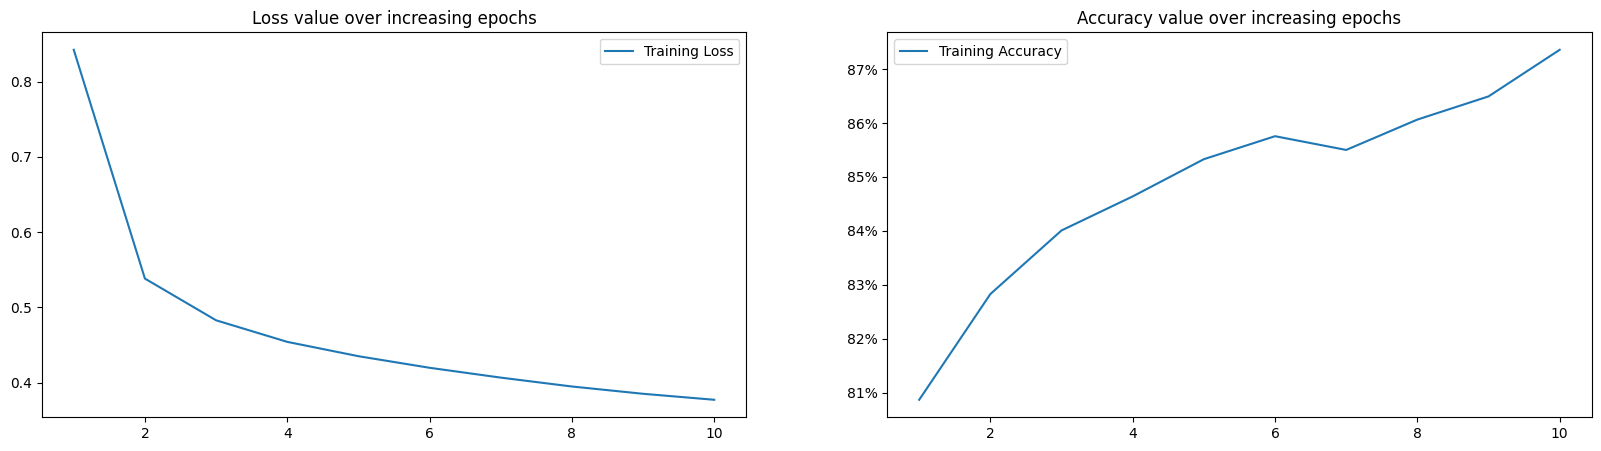

In [13]:
display_loss_accuracy(10,lossses, accuracies)

Scaling the input dataset so that it contains a much smaller range of values generally helps in achieving better model accuracy.